In [1]:
import pandas as pd

train_df = pd.read_csv('data/train.csv')
val_df = pd.read_csv('data/val.csv')
test_df = pd.read_csv('data/test.csv')

In [2]:
df1 = train_df.append(val_df, ignore_index=True).append(test_df, ignore_index=True)

len(df1)

14478

In [3]:
df1.rename(columns={'camera': 'source'}, inplace=True)
df1.head()

,image_path,label,subject,source
0,data/Camera 1/train/c0/1000.jpg,0,7,1
1,data/Camera 1/train/c0/1001.jpg,0,7,1
2,data/Camera 1/train/c0/1002.jpg,0,7,1
3,data/Camera 1/train/c0/1003.jpg,0,7,1
4,data/Camera 1/train/c0/1004.jpg,0,7,1


In [4]:
df1['subject'] = df1.subject.astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  14478 non-null  object
 1   label       14478 non-null  int64 
 2   subject     14478 non-null  object
 3   source      14478 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 452.6+ KB


In [5]:
df1.loc[df1.source == 1, 'source'] = 'Camera 1'
df1.loc[df1.source == 2, 'source'] = 'Camera 2'
df1['subject'] = 'p' + df1.subject
df1.head()

,image_path,label,subject,source
0,data/Camera 1/train/c0/1000.jpg,0,p7,Camera 1
1,data/Camera 1/train/c0/1001.jpg,0,p7,Camera 1
2,data/Camera 1/train/c0/1002.jpg,0,p7,Camera 1
3,data/Camera 1/train/c0/1003.jpg,0,p7,Camera 1
4,data/Camera 1/train/c0/1004.jpg,0,p7,Camera 1


In [6]:
import glob

df2 = []
for filepath in glob.glob('data/StateFarm/*/*'):
    classId = filepath.split('/')[-2][1:]
    df2.append({
        'image_path': filepath,
        'label': int(classId)
    })
    
df2 = pd.DataFrame(df2)
df2.head()

,image_path,label
0,data/StateFarm/c0/img_100026.jpg,0
1,data/StateFarm/c0/img_10003.jpg,0
2,data/StateFarm/c0/img_100050.jpg,0
3,data/StateFarm/c0/img_100074.jpg,0
4,data/StateFarm/c0/img_10012.jpg,0


In [8]:
len(df2) + len(df1)

36902

In [10]:
subjects = pd.read_csv('driver_imgs_list.csv')

In [11]:
subjects.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [12]:
subjects['img'] = 'data/StateFarm/' + subjects.classname + '/' + subjects.img

subjects.head()

,subject,classname,img
0,p002,c0,data/StateFarm/c0/img_44733.jpg
1,p002,c0,data/StateFarm/c0/img_72999.jpg
2,p002,c0,data/StateFarm/c0/img_25094.jpg
3,p002,c0,data/StateFarm/c0/img_69092.jpg
4,p002,c0,data/StateFarm/c0/img_92629.jpg


In [13]:
df2 = pd.merge(df2, subjects, left_on='image_path', right_on='img', sort=False)

df2.head()

,image_path,label,subject,classname,img
0,data/StateFarm/c0/img_100026.jpg,0,p015,c0,data/StateFarm/c0/img_100026.jpg
1,data/StateFarm/c0/img_10003.jpg,0,p022,c0,data/StateFarm/c0/img_10003.jpg
2,data/StateFarm/c0/img_100050.jpg,0,p022,c0,data/StateFarm/c0/img_100050.jpg
3,data/StateFarm/c0/img_100074.jpg,0,p051,c0,data/StateFarm/c0/img_100074.jpg
4,data/StateFarm/c0/img_10012.jpg,0,p002,c0,data/StateFarm/c0/img_10012.jpg


In [14]:
df2 = df2[['image_path', 'label', 'subject']]
df2['source'] = 'StateFarm'

df2.head()

,image_path,label,subject,source
0,data/StateFarm/c0/img_100026.jpg,0,p015,StateFarm
1,data/StateFarm/c0/img_10003.jpg,0,p022,StateFarm
2,data/StateFarm/c0/img_100050.jpg,0,p022,StateFarm
3,data/StateFarm/c0/img_100074.jpg,0,p051,StateFarm
4,data/StateFarm/c0/img_10012.jpg,0,p002,StateFarm


In [15]:
df = df1.append(df2)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36902 entries, 0 to 22423
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  36902 non-null  object
 1   label       36902 non-null  int64 
 2   subject     36902 non-null  object
 3   source      36902 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [17]:
df.subject.nunique()

71

In [18]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=1, train_size=.6, random_state=42)

for train_idx, val_test_idx in gss.split(df, groups=df.subject):
    val_test_df = df.iloc[val_test_idx]
    train_df = df.iloc[train_idx]

In [19]:
gss = GroupShuffleSplit(n_splits=1, train_size=.5, random_state=42)

for val_idx, test_idx in gss.split(val_test_df, groups=val_test_df.subject):
    test_df = val_test_df.iloc[test_idx]
    val_df = val_test_df.iloc[val_idx]

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


def explore(df):
    plt.figure(figsize=(15, 10))
    # class distribution
    sns.countplot(x='label', data=df)
    plt.title(f'Class Distribution')
    plt.show()

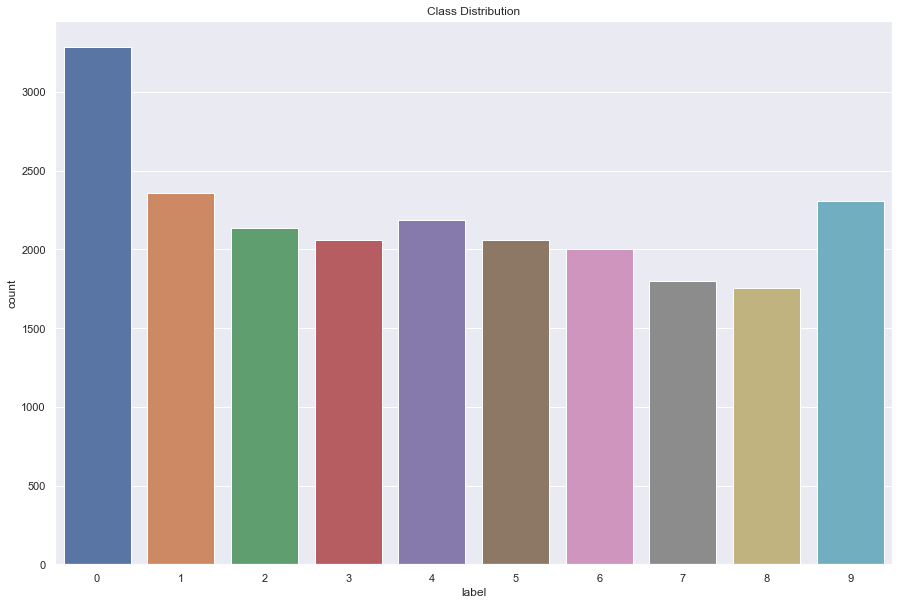

In [21]:
explore(train_df)

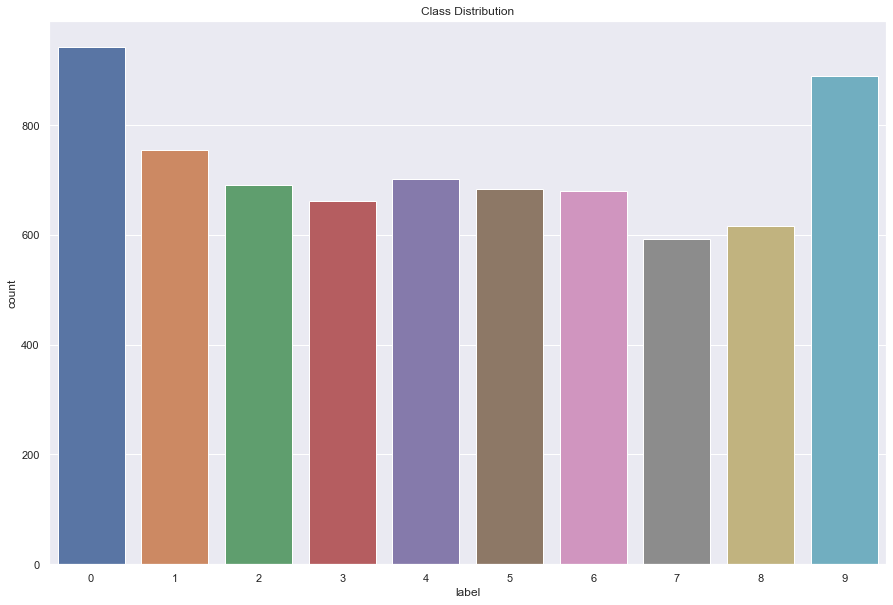

In [22]:
explore(val_df)

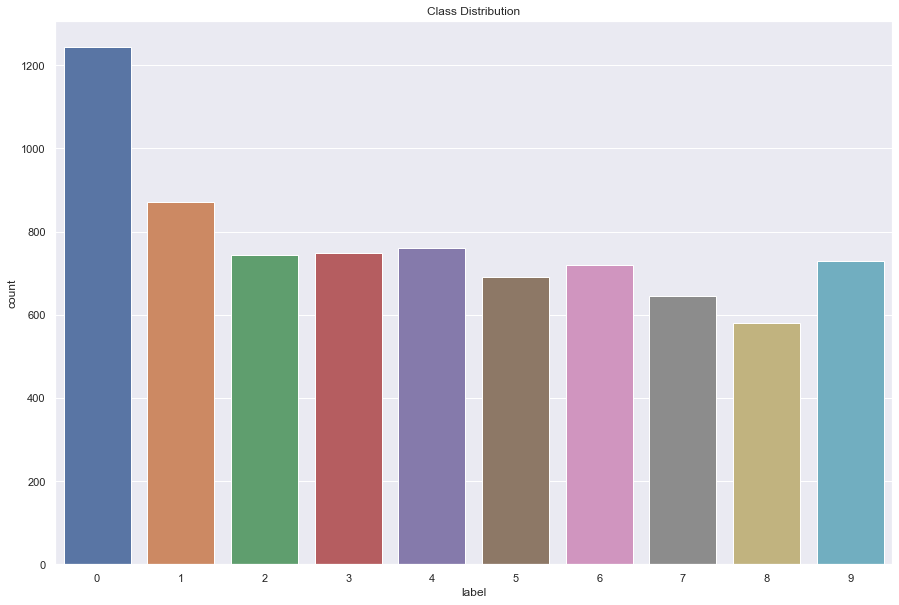

In [23]:
explore(test_df)

In [26]:
train_df.subject.nunique(), len(train_df)

(42, 21949)

In [28]:
val_df.subject.nunique(), len(val_df)

(14, 7215)

In [29]:
test_df.subject.nunique(), len(test_df)

(15, 7738)

In [31]:
from collections import Counter
print(Counter(train_df.source))
print(Counter(val_df.source))
print(Counter(test_df.source))

Counter({'StateFarm': 13504, 'Camera 1': 6645, 'Camera 2': 1800})
Counter({'StateFarm': 4495, 'Camera 1': 1920, 'Camera 2': 800})
Counter({'StateFarm': 4425, 'Camera 1': 3113, 'Camera 2': 200})


In [33]:
print(Counter(train_df.subject))
print(Counter(val_df.subject))
print(Counter(test_df.subject))

Counter({'p022': 1233, 'p026': 1196, 'p049': 1011, 'p051': 920, 'p014': 876, 'p015': 875, 'p047': 835, 'p012': 823, 'p081': 823, 'p064': 820, 'p075': 814, 'p061': 809, 'p056': 794, 'p045': 724, 'p041': 605, 'p8': 550, 'p10': 515, 'p5': 461, 'p15': 445, 'p19': 429, 'p7': 420, 'p6': 398, 'p20': 392, 'p2': 360, 'p9': 358, 'p12': 357, 'p1': 354, 'p22': 352, 'p072': 346, 'p21': 340, 'p23': 326, 'p3': 301, 'p25': 287, 'p32': 200, 'p42': 200, 'p44': 200, 'p37': 200, 'p40': 200, 'p43': 200, 'p33': 200, 'p45': 200, 'p38': 200})
Counter({'p021': 1237, 'p024': 1226, 'p050': 790, 'p039': 651, 'p042': 591, 'p28': 531, 'p29': 439, 'p17': 346, 'p27': 335, 'p11': 269, 'p34': 200, 'p35': 200, 'p36': 200, 'p41': 200})
Counter({'p016': 1078, 'p066': 1034, 'p035': 848, 'p052': 740, 'p002': 725, 'p26': 431, 'p14': 411, 'p13': 400, 'p24': 381, 'p18': 367, 'p30': 320, 'p31': 281, 'p4': 280, 'p16': 242, 'p39': 200})


In [35]:
df_images = list(train_df.image_path) + list(val_df.image_path) + list(test_df.image_path)
df_images.sort()
len(df_images)

36902

In [36]:
all_images = glob.glob('data/*/*/*/*.jpg') + glob.glob('data/*/*/*.jpg')
all_images.sort()
len(all_images)

36902

In [40]:
from tqdm import tqdm

for img1, img2 in tqdm(zip(all_images, df_images)):
    print(img1, img2)
    if img1 != img2:
        print('Error!')

71it [00:00, 403.85it/s]

data/Camera 1/test/c0/0.jpg data/Camera 1/test/c0/0.jpg
data/Camera 1/test/c0/1.jpg data/Camera 1/test/c0/1.jpg
data/Camera 1/test/c0/10.jpg data/Camera 1/test/c0/10.jpg
data/Camera 1/test/c0/100.jpg data/Camera 1/test/c0/100.jpg
data/Camera 1/test/c0/101.jpg data/Camera 1/test/c0/101.jpg
data/Camera 1/test/c0/102.jpg data/Camera 1/test/c0/102.jpg
data/Camera 1/test/c0/103.jpg data/Camera 1/test/c0/103.jpg
data/Camera 1/test/c0/104.jpg data/Camera 1/test/c0/104.jpg
data/Camera 1/test/c0/105.jpg data/Camera 1/test/c0/105.jpg
data/Camera 1/test/c0/106.jpg data/Camera 1/test/c0/106.jpg
data/Camera 1/test/c0/107.jpg data/Camera 1/test/c0/107.jpg
data/Camera 1/test/c0/108.jpg data/Camera 1/test/c0/108.jpg
data/Camera 1/test/c0/109.jpg data/Camera 1/test/c0/109.jpg
data/Camera 1/test/c0/11.jpg data/Camera 1/test/c0/11.jpg
data/Camera 1/test/c0/110.jpg data/Camera 1/test/c0/110.jpg
data/Camera 1/test/c0/111.jpg data/Camera 1/test/c0/111.jpg
data/Camera 1/test/c0/112.jpg data/Camera 1/test/c0/

1247it [00:00, 3902.14it/s]

data/Camera 1/test/c2/121111.jpg data/Camera 1/test/c2/121111.jpg
data/Camera 1/test/c2/122111.jpg data/Camera 1/test/c2/122111.jpg
data/Camera 1/test/c2/123111.jpg data/Camera 1/test/c2/123111.jpg
data/Camera 1/test/c2/124111.jpg data/Camera 1/test/c2/124111.jpg
data/Camera 1/test/c2/125111.jpg data/Camera 1/test/c2/125111.jpg
data/Camera 1/test/c2/126111.jpg data/Camera 1/test/c2/126111.jpg
data/Camera 1/test/c2/127111.jpg data/Camera 1/test/c2/127111.jpg
data/Camera 1/test/c2/128111.jpg data/Camera 1/test/c2/128111.jpg
data/Camera 1/test/c2/129111.jpg data/Camera 1/test/c2/129111.jpg
data/Camera 1/test/c2/130111.jpg data/Camera 1/test/c2/130111.jpg
data/Camera 1/test/c2/13111.jpg data/Camera 1/test/c2/13111.jpg
data/Camera 1/test/c2/131111.jpg data/Camera 1/test/c2/131111.jpg
data/Camera 1/test/c2/132111.jpg data/Camera 1/test/c2/132111.jpg
data/Camera 1/test/c2/133111.jpg data/Camera 1/test/c2/133111.jpg
data/Camera 1/test/c2/14111.jpg data/Camera 1/test/c2/14111.jpg
data/Camera 1/

2319it [00:00, 4603.40it/s]


data/Camera 1/train/c0/1452.jpg data/Camera 1/train/c0/1452.jpg
data/Camera 1/train/c0/1453.jpg data/Camera 1/train/c0/1453.jpg
data/Camera 1/train/c0/1454.jpg data/Camera 1/train/c0/1454.jpg
data/Camera 1/train/c0/1455.jpg data/Camera 1/train/c0/1455.jpg
data/Camera 1/train/c0/1456.jpg data/Camera 1/train/c0/1456.jpg
data/Camera 1/train/c0/1457.jpg data/Camera 1/train/c0/1457.jpg
data/Camera 1/train/c0/1458.jpg data/Camera 1/train/c0/1458.jpg
data/Camera 1/train/c0/1459.jpg data/Camera 1/train/c0/1459.jpg
data/Camera 1/train/c0/1460.jpg data/Camera 1/train/c0/1460.jpg
data/Camera 1/train/c0/1461.jpg data/Camera 1/train/c0/1461.jpg
data/Camera 1/train/c0/1462.jpg data/Camera 1/train/c0/1462.jpg
data/Camera 1/train/c0/1463.jpg data/Camera 1/train/c0/1463.jpg
data/Camera 1/train/c0/1464.jpg data/Camera 1/train/c0/1464.jpg
data/Camera 1/train/c0/1465.jpg data/Camera 1/train/c0/1465.jpg
data/Camera 1/train/c0/1466.jpg data/Camera 1/train/c0/1466.jpg
data/Camera 1/train/c0/1467.jpg data/Ca

2957it [00:00, 4943.85it/s]

 data/Camera 1/train/c0/3062.jpg
data/Camera 1/train/c0/3063.jpg data/Camera 1/train/c0/3063.jpg
data/Camera 1/train/c0/3064.jpg data/Camera 1/train/c0/3064.jpg
data/Camera 1/train/c0/3065.jpg data/Camera 1/train/c0/3065.jpg
data/Camera 1/train/c0/3066.jpg data/Camera 1/train/c0/3066.jpg
data/Camera 1/train/c0/3067.jpg data/Camera 1/train/c0/3067.jpg
data/Camera 1/train/c0/3068.jpg data/Camera 1/train/c0/3068.jpg
data/Camera 1/train/c0/3069.jpg data/Camera 1/train/c0/3069.jpg
data/Camera 1/train/c0/3083.jpg data/Camera 1/train/c0/3083.jpg
data/Camera 1/train/c0/3084.jpg data/Camera 1/train/c0/3084.jpg
data/Camera 1/train/c0/3085.jpg data/Camera 1/train/c0/3085.jpg
data/Camera 1/train/c0/3086.jpg data/Camera 1/train/c0/3086.jpg
data/Camera 1/train/c0/3087.jpg data/Camera 1/train/c0/3087.jpg
data/Camera 1/train/c0/3088.jpg data/Camera 1/train/c0/3088.jpg
data/Camera 1/train/c0/3089.jpg data/Camera 1/train/c0/3089.jpg
data/Camera 1/train/c0/3090.jpg data/Camera 1/train/c0/3090.jpg
data/Ca

4177it [00:00, 5382.64it/s]

data/Camera 1/train/c0/947.jpg data/Camera 1/train/c0/947.jpg
data/Camera 1/train/c0/948.jpg data/Camera 1/train/c0/948.jpg
data/Camera 1/train/c0/949.jpg data/Camera 1/train/c0/949.jpg
data/Camera 1/train/c0/950.jpg data/Camera 1/train/c0/950.jpg
data/Camera 1/train/c0/951.jpg data/Camera 1/train/c0/951.jpg
data/Camera 1/train/c0/952.jpg data/Camera 1/train/c0/952.jpg
data/Camera 1/train/c0/953.jpg data/Camera 1/train/c0/953.jpg
data/Camera 1/train/c0/954.jpg data/Camera 1/train/c0/954.jpg
data/Camera 1/train/c0/955.jpg data/Camera 1/train/c0/955.jpg
data/Camera 1/train/c0/956.jpg data/Camera 1/train/c0/956.jpg
data/Camera 1/train/c0/957.jpg data/Camera 1/train/c0/957.jpg
data/Camera 1/train/c0/958.jpg data/Camera 1/train/c0/958.jpg
data/Camera 1/train/c0/959.jpg data/Camera 1/train/c0/959.jpg
data/Camera 1/train/c0/961.jpg data/Camera 1/train/c0/961.jpg
data/Camera 1/train/c0/962.jpg data/Camera 1/train/c0/962.jpg
data/Camera 1/train/c0/963.jpg data/Camera 1/train/c0/963.jpg
data/Cam

5437it [00:01, 5454.01it/s]

data/Camera 1/train/c1/780.jpg
data/Camera 1/train/c1/781.jpg data/Camera 1/train/c1/781.jpg
data/Camera 1/train/c1/782.jpg data/Camera 1/train/c1/782.jpg
data/Camera 1/train/c1/783.jpg data/Camera 1/train/c1/783.jpg
data/Camera 1/train/c1/795.jpg data/Camera 1/train/c1/795.jpg
data/Camera 1/train/c1/796.jpg data/Camera 1/train/c1/796.jpg
data/Camera 1/train/c1/797.jpg data/Camera 1/train/c1/797.jpg
data/Camera 1/train/c1/798.jpg data/Camera 1/train/c1/798.jpg
data/Camera 1/train/c1/799.jpg data/Camera 1/train/c1/799.jpg
data/Camera 1/train/c1/800.jpg data/Camera 1/train/c1/800.jpg
data/Camera 1/train/c1/801.jpg data/Camera 1/train/c1/801.jpg
data/Camera 1/train/c1/802.jpg data/Camera 1/train/c1/802.jpg
data/Camera 1/train/c1/803.jpg data/Camera 1/train/c1/803.jpg
data/Camera 1/train/c1/804.jpg data/Camera 1/train/c1/804.jpg
data/Camera 1/train/c1/805.jpg data/Camera 1/train/c1/805.jpg
data/Camera 1/train/c1/806.jpg data/Camera 1/train/c1/806.jpg
data/Camera 1/train/c1/807.jpg data/Cam

6584it [00:01, 5528.55it/s]

 data/Camera 1/train/c3/11880.jpg
data/Camera 1/train/c3/11890.jpg data/Camera 1/train/c3/11890.jpg
data/Camera 1/train/c3/11900.jpg data/Camera 1/train/c3/11900.jpg
data/Camera 1/train/c3/11910.jpg data/Camera 1/train/c3/11910.jpg
data/Camera 1/train/c3/12170.jpg data/Camera 1/train/c3/12170.jpg
data/Camera 1/train/c3/12180.jpg data/Camera 1/train/c3/12180.jpg
data/Camera 1/train/c3/12190.jpg data/Camera 1/train/c3/12190.jpg
data/Camera 1/train/c3/12200.jpg data/Camera 1/train/c3/12200.jpg
data/Camera 1/train/c3/12210.jpg data/Camera 1/train/c3/12210.jpg
data/Camera 1/train/c3/12220.jpg data/Camera 1/train/c3/12220.jpg
data/Camera 1/train/c3/12230.jpg data/Camera 1/train/c3/12230.jpg
data/Camera 1/train/c3/12240.jpg data/Camera 1/train/c3/12240.jpg
data/Camera 1/train/c3/12250.jpg data/Camera 1/train/c3/12250.jpg
data/Camera 1/train/c3/12260.jpg data/Camera 1/train/c3/12260.jpg
data/Camera 1/train/c3/12270.jpg data/Camera 1/train/c3/12270.jpg
data/Camera 1/train/c3/12280.jpg data/Came

7700it [00:01, 5355.89it/s]

data/Camera 1/train/c4/339000.jpg data/Camera 1/train/c4/339000.jpg
data/Camera 1/train/c4/340000.jpg data/Camera 1/train/c4/340000.jpg
data/Camera 1/train/c4/341000.jpg data/Camera 1/train/c4/341000.jpg
data/Camera 1/train/c4/342000.jpg data/Camera 1/train/c4/342000.jpg
data/Camera 1/train/c4/343000.jpg data/Camera 1/train/c4/343000.jpg
data/Camera 1/train/c4/352000.jpg data/Camera 1/train/c4/352000.jpg
data/Camera 1/train/c4/353000.jpg data/Camera 1/train/c4/353000.jpg
data/Camera 1/train/c4/354000.jpg data/Camera 1/train/c4/354000.jpg
data/Camera 1/train/c4/355000.jpg data/Camera 1/train/c4/355000.jpg
data/Camera 1/train/c4/356000.jpg data/Camera 1/train/c4/356000.jpg
data/Camera 1/train/c4/357000.jpg data/Camera 1/train/c4/357000.jpg
data/Camera 1/train/c4/358000.jpg data/Camera 1/train/c4/358000.jpg
data/Camera 1/train/c4/359000.jpg data/Camera 1/train/c4/359000.jpg
data/Camera 1/train/c4/360000.jpg data/Camera 1/train/c4/360000.jpg
data/Camera 1/train/c4/361000.jpg data/Camera 1/

8816it [00:01, 5475.46it/s]

 data/Camera 1/train/c5/8590000.jpg
data/Camera 1/train/c5/8600000.jpg data/Camera 1/train/c5/8600000.jpg
data/Camera 1/train/c5/8610000.jpg data/Camera 1/train/c5/8610000.jpg
data/Camera 1/train/c5/8620000.jpg data/Camera 1/train/c5/8620000.jpg
data/Camera 1/train/c5/8630000.jpg data/Camera 1/train/c5/8630000.jpg
data/Camera 1/train/c5/8640000.jpg data/Camera 1/train/c5/8640000.jpg
data/Camera 1/train/c5/8650000.jpg data/Camera 1/train/c5/8650000.jpg
data/Camera 1/train/c5/8660000.jpg data/Camera 1/train/c5/8660000.jpg
data/Camera 1/train/c5/8670000.jpg data/Camera 1/train/c5/8670000.jpg
data/Camera 1/train/c5/8680000.jpg data/Camera 1/train/c5/8680000.jpg
data/Camera 1/train/c5/8690000.jpg data/Camera 1/train/c5/8690000.jpg
data/Camera 1/train/c5/8780000.jpg data/Camera 1/train/c5/8780000.jpg
data/Camera 1/train/c5/8790000.jpg data/Camera 1/train/c5/8790000.jpg
data/Camera 1/train/c5/8800000.jpg data/Camera 1/train/c5/8800000.jpg
data/Camera 1/train/c5/8810000.jpg data/Camera 1/train

9991it [00:01, 5498.24it/s]


data/Camera 1/train/c7/341000000.jpg data/Camera 1/train/c7/341000000.jpg
data/Camera 1/train/c7/342000000.jpg data/Camera 1/train/c7/342000000.jpg
data/Camera 1/train/c7/343000000.jpg data/Camera 1/train/c7/343000000.jpg
data/Camera 1/train/c7/344000000.jpg data/Camera 1/train/c7/344000000.jpg
data/Camera 1/train/c7/345000000.jpg data/Camera 1/train/c7/345000000.jpg
data/Camera 1/train/c7/346000000.jpg data/Camera 1/train/c7/346000000.jpg
data/Camera 1/train/c7/347000000.jpg data/Camera 1/train/c7/347000000.jpg
data/Camera 1/train/c7/348000000.jpg data/Camera 1/train/c7/348000000.jpg
data/Camera 1/train/c7/349000000.jpg data/Camera 1/train/c7/349000000.jpg
data/Camera 1/train/c7/350000000.jpg data/Camera 1/train/c7/350000000.jpg
data/Camera 1/train/c7/351000000.jpg data/Camera 1/train/c7/351000000.jpg
data/Camera 1/train/c7/352000000.jpg data/Camera 1/train/c7/352000000.jpg
data/Camera 1/train/c7/353000000.jpg data/Camera 1/train/c7/353000000.jpg
data/Camera 1/train/c7/354000000.jpg 

11094it [00:02, 5044.20it/s]


data/Camera 1/train/c9/107800000000.jpg data/Camera 1/train/c9/107800000000.jpg
data/Camera 1/train/c9/107900000000.jpg data/Camera 1/train/c9/107900000000.jpg
data/Camera 1/train/c9/108000000000.jpg data/Camera 1/train/c9/108000000000.jpg
data/Camera 1/train/c9/108100000000.jpg data/Camera 1/train/c9/108100000000.jpg
data/Camera 1/train/c9/108200000000.jpg data/Camera 1/train/c9/108200000000.jpg
data/Camera 1/train/c9/108300000000.jpg data/Camera 1/train/c9/108300000000.jpg
data/Camera 1/train/c9/108400000000.jpg data/Camera 1/train/c9/108400000000.jpg
data/Camera 1/train/c9/108500000000.jpg data/Camera 1/train/c9/108500000000.jpg
data/Camera 1/train/c9/108600000000.jpg data/Camera 1/train/c9/108600000000.jpg
data/Camera 1/train/c9/108700000000.jpg data/Camera 1/train/c9/108700000000.jpg
data/Camera 1/train/c9/108800000000.jpg data/Camera 1/train/c9/108800000000.jpg
data/Camera 1/train/c9/108900000000.jpg data/Camera 1/train/c9/108900000000.jpg
data/Camera 1/train/c9/109000000000.jpg

12173it [00:02, 4974.13it/s]

data/Camera 1/train/c9/253500000000.jpg
data/Camera 1/train/c9/253600000000.jpg data/Camera 1/train/c9/253600000000.jpg
data/Camera 1/train/c9/253700000000.jpg data/Camera 1/train/c9/253700000000.jpg
data/Camera 1/train/c9/253800000000.jpg data/Camera 1/train/c9/253800000000.jpg
data/Camera 1/train/c9/253900000000.jpg data/Camera 1/train/c9/253900000000.jpg
data/Camera 1/train/c9/254000000000.jpg data/Camera 1/train/c9/254000000000.jpg
data/Camera 1/train/c9/254100000000.jpg data/Camera 1/train/c9/254100000000.jpg
data/Camera 1/train/c9/254200000000.jpg data/Camera 1/train/c9/254200000000.jpg
data/Camera 1/train/c9/254300000000.jpg data/Camera 1/train/c9/254300000000.jpg
data/Camera 1/train/c9/254400000000.jpg data/Camera 1/train/c9/254400000000.jpg
data/Camera 1/train/c9/254500000000.jpg data/Camera 1/train/c9/254500000000.jpg
data/Camera 1/train/c9/254600000000.jpg data/Camera 1/train/c9/254600000000.jpg
data/Camera 1/train/c9/254700000000.jpg data/Camera 1/train/c9/254700000000.jpg


13316it [00:02, 5310.21it/s]

data/Camera 2/test/c7/67010.jpg
data/Camera 2/test/c7/76257.jpg data/Camera 2/test/c7/76257.jpg
data/Camera 2/test/c7/76260.jpg data/Camera 2/test/c7/76260.jpg
data/Camera 2/test/c7/76265.jpg data/Camera 2/test/c7/76265.jpg
data/Camera 2/test/c7/76313.jpg data/Camera 2/test/c7/76313.jpg
data/Camera 2/test/c7/76385.jpg data/Camera 2/test/c7/76385.jpg
data/Camera 2/test/c7/76388.jpg data/Camera 2/test/c7/76388.jpg
data/Camera 2/test/c7/76513.jpg data/Camera 2/test/c7/76513.jpg
data/Camera 2/test/c7/76524.jpg data/Camera 2/test/c7/76524.jpg
data/Camera 2/test/c7/76561.jpg data/Camera 2/test/c7/76561.jpg
data/Camera 2/test/c7/76601.jpg data/Camera 2/test/c7/76601.jpg
data/Camera 2/test/c7/76620.jpg data/Camera 2/test/c7/76620.jpg
data/Camera 2/test/c7/76641.jpg data/Camera 2/test/c7/76641.jpg
data/Camera 2/test/c7/76673.jpg data/Camera 2/test/c7/76673.jpg
data/Camera 2/test/c7/76713.jpg data/Camera 2/test/c7/76713.jpg
data/Camera 2/test/c7/76732.jpg data/Camera 2/test/c7/76732.jpg
data/Cam

14494it [00:02, 5563.06it/s]

data/Camera 2/train/c4/14276.jpg data/Camera 2/train/c4/14276.jpg
data/Camera 2/train/c4/14295.jpg data/Camera 2/train/c4/14295.jpg
data/Camera 2/train/c4/14328.jpg data/Camera 2/train/c4/14328.jpg
data/Camera 2/train/c4/14376.jpg data/Camera 2/train/c4/14376.jpg
data/Camera 2/train/c4/14440.jpg data/Camera 2/train/c4/14440.jpg
data/Camera 2/train/c4/23598.jpg data/Camera 2/train/c4/23598.jpg
data/Camera 2/train/c4/23601.jpg data/Camera 2/train/c4/23601.jpg
data/Camera 2/train/c4/23642.jpg data/Camera 2/train/c4/23642.jpg
data/Camera 2/train/c4/23702.jpg data/Camera 2/train/c4/23702.jpg
data/Camera 2/train/c4/23750.jpg data/Camera 2/train/c4/23750.jpg
data/Camera 2/train/c4/23805.jpg data/Camera 2/train/c4/23805.jpg
data/Camera 2/train/c4/23818.jpg data/Camera 2/train/c4/23818.jpg
data/Camera 2/train/c4/23890.jpg data/Camera 2/train/c4/23890.jpg
data/Camera 2/train/c4/23949.jpg data/Camera 2/train/c4/23949.jpg
data/Camera 2/train/c4/23978.jpg data/Camera 2/train/c4/23978.jpg
data/Camer

15659it [00:03, 5448.99it/s]

data/StateFarm/c0/img_13639.jpg
data/StateFarm/c0/img_1367.jpg data/StateFarm/c0/img_1367.jpg
data/StateFarm/c0/img_13675.jpg data/StateFarm/c0/img_13675.jpg
data/StateFarm/c0/img_13696.jpg data/StateFarm/c0/img_13696.jpg
data/StateFarm/c0/img_13699.jpg data/StateFarm/c0/img_13699.jpg
data/StateFarm/c0/img_13820.jpg data/StateFarm/c0/img_13820.jpg
data/StateFarm/c0/img_13852.jpg data/StateFarm/c0/img_13852.jpg
data/StateFarm/c0/img_139.jpg data/StateFarm/c0/img_139.jpg
data/StateFarm/c0/img_13907.jpg data/StateFarm/c0/img_13907.jpg
data/StateFarm/c0/img_13916.jpg data/StateFarm/c0/img_13916.jpg
data/StateFarm/c0/img_13922.jpg data/StateFarm/c0/img_13922.jpg
data/StateFarm/c0/img_13935.jpg data/StateFarm/c0/img_13935.jpg
data/StateFarm/c0/img_13938.jpg data/StateFarm/c0/img_13938.jpg
data/StateFarm/c0/img_13950.jpg data/StateFarm/c0/img_13950.jpg
data/StateFarm/c0/img_13965.jpg data/StateFarm/c0/img_13965.jpg
data/StateFarm/c0/img_14027.jpg data/StateFarm/c0/img_14027.jpg
data/StateFarm

16208it [00:03, 5379.90it/s]

data/StateFarm/c0/img_56773.jpg
data/StateFarm/c0/img_56851.jpg data/StateFarm/c0/img_56851.jpg
data/StateFarm/c0/img_56931.jpg data/StateFarm/c0/img_56931.jpg
data/StateFarm/c0/img_56942.jpg data/StateFarm/c0/img_56942.jpg
data/StateFarm/c0/img_57075.jpg data/StateFarm/c0/img_57075.jpg
data/StateFarm/c0/img_57096.jpg data/StateFarm/c0/img_57096.jpg
data/StateFarm/c0/img_57112.jpg data/StateFarm/c0/img_57112.jpg
data/StateFarm/c0/img_57126.jpg data/StateFarm/c0/img_57126.jpg
data/StateFarm/c0/img_57153.jpg data/StateFarm/c0/img_57153.jpg
data/StateFarm/c0/img_5716.jpg data/StateFarm/c0/img_5716.jpg
data/StateFarm/c0/img_57175.jpg data/StateFarm/c0/img_57175.jpg
data/StateFarm/c0/img_57215.jpg data/StateFarm/c0/img_57215.jpg
data/StateFarm/c0/img_57216.jpg data/StateFarm/c0/img_57216.jpg
data/StateFarm/c0/img_57235.jpg data/StateFarm/c0/img_57235.jpg
data/StateFarm/c0/img_57365.jpg data/StateFarm/c0/img_57365.jpg
data/StateFarm/c0/img_57373.jpg data/StateFarm/c0/img_57373.jpg
data/State

17361it [00:03, 5317.95it/s]

data/StateFarm/c0/img_94394.jpg
data/StateFarm/c0/img_94406.jpg data/StateFarm/c0/img_94406.jpg
data/StateFarm/c0/img_94437.jpg data/StateFarm/c0/img_94437.jpg
data/StateFarm/c0/img_94525.jpg data/StateFarm/c0/img_94525.jpg
data/StateFarm/c0/img_94529.jpg data/StateFarm/c0/img_94529.jpg
data/StateFarm/c0/img_94538.jpg data/StateFarm/c0/img_94538.jpg
data/StateFarm/c0/img_9457.jpg data/StateFarm/c0/img_9457.jpg
data/StateFarm/c0/img_94635.jpg data/StateFarm/c0/img_94635.jpg
data/StateFarm/c0/img_94642.jpg data/StateFarm/c0/img_94642.jpg
data/StateFarm/c0/img_94674.jpg data/StateFarm/c0/img_94674.jpg
data/StateFarm/c0/img_94679.jpg data/StateFarm/c0/img_94679.jpg
data/StateFarm/c0/img_94690.jpg data/StateFarm/c0/img_94690.jpg
data/StateFarm/c0/img_948.jpg data/StateFarm/c0/img_948.jpg
data/StateFarm/c0/img_94809.jpg data/StateFarm/c0/img_94809.jpg
data/StateFarm/c0/img_94824.jpg data/StateFarm/c0/img_94824.jpg
data/StateFarm/c0/img_9484.jpg data/StateFarm/c0/img_9484.jpg
data/StateFarm/c

18597it [00:03, 5453.46it/s]

data/StateFarm/c1/img_45096.jpg
data/StateFarm/c1/img_45198.jpg data/StateFarm/c1/img_45198.jpg
data/StateFarm/c1/img_4525.jpg data/StateFarm/c1/img_4525.jpg
data/StateFarm/c1/img_45292.jpg data/StateFarm/c1/img_45292.jpg
data/StateFarm/c1/img_45321.jpg data/StateFarm/c1/img_45321.jpg
data/StateFarm/c1/img_45354.jpg data/StateFarm/c1/img_45354.jpg
data/StateFarm/c1/img_45420.jpg data/StateFarm/c1/img_45420.jpg
data/StateFarm/c1/img_45471.jpg data/StateFarm/c1/img_45471.jpg
data/StateFarm/c1/img_45489.jpg data/StateFarm/c1/img_45489.jpg
data/StateFarm/c1/img_45505.jpg data/StateFarm/c1/img_45505.jpg
data/StateFarm/c1/img_45506.jpg data/StateFarm/c1/img_45506.jpg
data/StateFarm/c1/img_45599.jpg data/StateFarm/c1/img_45599.jpg
data/StateFarm/c1/img_4562.jpg data/StateFarm/c1/img_4562.jpg
data/StateFarm/c1/img_45632.jpg data/StateFarm/c1/img_45632.jpg
data/StateFarm/c1/img_45657.jpg data/StateFarm/c1/img_45657.jpg
data/StateFarm/c1/img_45664.jpg data/StateFarm/c1/img_45664.jpg
data/StateFa

19746it [00:03, 5523.69it/s]

data/StateFarm/c1/img_90594.jpg
data/StateFarm/c1/img_90606.jpg data/StateFarm/c1/img_90606.jpg
data/StateFarm/c1/img_9061.jpg data/StateFarm/c1/img_9061.jpg
data/StateFarm/c1/img_90672.jpg data/StateFarm/c1/img_90672.jpg
data/StateFarm/c1/img_90701.jpg data/StateFarm/c1/img_90701.jpg
data/StateFarm/c1/img_90710.jpg data/StateFarm/c1/img_90710.jpg
data/StateFarm/c1/img_90725.jpg data/StateFarm/c1/img_90725.jpg
data/StateFarm/c1/img_90727.jpg data/StateFarm/c1/img_90727.jpg
data/StateFarm/c1/img_90912.jpg data/StateFarm/c1/img_90912.jpg
data/StateFarm/c1/img_91020.jpg data/StateFarm/c1/img_91020.jpg
data/StateFarm/c1/img_91032.jpg data/StateFarm/c1/img_91032.jpg
data/StateFarm/c1/img_91135.jpg data/StateFarm/c1/img_91135.jpg
data/StateFarm/c1/img_91152.jpg data/StateFarm/c1/img_91152.jpg
data/StateFarm/c1/img_9122.jpg data/StateFarm/c1/img_9122.jpg
data/StateFarm/c1/img_9130.jpg data/StateFarm/c1/img_9130.jpg
data/StateFarm/c1/img_91404.jpg data/StateFarm/c1/img_91404.jpg
data/StateFarm

20877it [00:04, 5172.36it/s]

data/StateFarm/c2/img_40897.jpg
data/StateFarm/c2/img_40981.jpg data/StateFarm/c2/img_40981.jpg
data/StateFarm/c2/img_40988.jpg data/StateFarm/c2/img_40988.jpg
data/StateFarm/c2/img_4100.jpg data/StateFarm/c2/img_4100.jpg
data/StateFarm/c2/img_41219.jpg data/StateFarm/c2/img_41219.jpg
data/StateFarm/c2/img_41294.jpg data/StateFarm/c2/img_41294.jpg
data/StateFarm/c2/img_41327.jpg data/StateFarm/c2/img_41327.jpg
data/StateFarm/c2/img_41336.jpg data/StateFarm/c2/img_41336.jpg
data/StateFarm/c2/img_41349.jpg data/StateFarm/c2/img_41349.jpg
data/StateFarm/c2/img_4138.jpg data/StateFarm/c2/img_4138.jpg
data/StateFarm/c2/img_41516.jpg data/StateFarm/c2/img_41516.jpg
data/StateFarm/c2/img_41541.jpg data/StateFarm/c2/img_41541.jpg
data/StateFarm/c2/img_41592.jpg data/StateFarm/c2/img_41592.jpg
data/StateFarm/c2/img_41625.jpg data/StateFarm/c2/img_41625.jpg
data/StateFarm/c2/img_41660.jpg data/StateFarm/c2/img_41660.jpg
data/StateFarm/c2/img_41662.jpg data/StateFarm/c2/img_41662.jpg
data/StateFa

21896it [00:04, 4833.04it/s]


data/StateFarm/c2/img_79728.jpg data/StateFarm/c2/img_79728.jpg
data/StateFarm/c2/img_79768.jpg data/StateFarm/c2/img_79768.jpg
data/StateFarm/c2/img_79769.jpg data/StateFarm/c2/img_79769.jpg
data/StateFarm/c2/img_79797.jpg data/StateFarm/c2/img_79797.jpg
data/StateFarm/c2/img_79898.jpg data/StateFarm/c2/img_79898.jpg
data/StateFarm/c2/img_79923.jpg data/StateFarm/c2/img_79923.jpg
data/StateFarm/c2/img_79960.jpg data/StateFarm/c2/img_79960.jpg
data/StateFarm/c2/img_79978.jpg data/StateFarm/c2/img_79978.jpg
data/StateFarm/c2/img_80014.jpg data/StateFarm/c2/img_80014.jpg
data/StateFarm/c2/img_80022.jpg data/StateFarm/c2/img_80022.jpg
data/StateFarm/c2/img_80099.jpg data/StateFarm/c2/img_80099.jpg
data/StateFarm/c2/img_80101.jpg data/StateFarm/c2/img_80101.jpg
data/StateFarm/c2/img_80107.jpg data/StateFarm/c2/img_80107.jpg
data/StateFarm/c2/img_8013.jpg data/StateFarm/c2/img_8013.jpg
data/StateFarm/c2/img_80176.jpg data/StateFarm/c2/img_80176.jpg
data/StateFarm/c2/img_80263.jpg data/Stat

22878it [00:04, 4802.21it/s]


data/StateFarm/c3/img_322.jpg data/StateFarm/c3/img_322.jpg
data/StateFarm/c3/img_32285.jpg data/StateFarm/c3/img_32285.jpg
data/StateFarm/c3/img_32323.jpg data/StateFarm/c3/img_32323.jpg
data/StateFarm/c3/img_32372.jpg data/StateFarm/c3/img_32372.jpg
data/StateFarm/c3/img_32391.jpg data/StateFarm/c3/img_32391.jpg
data/StateFarm/c3/img_32399.jpg data/StateFarm/c3/img_32399.jpg
data/StateFarm/c3/img_32418.jpg data/StateFarm/c3/img_32418.jpg
data/StateFarm/c3/img_32433.jpg data/StateFarm/c3/img_32433.jpg
data/StateFarm/c3/img_32521.jpg data/StateFarm/c3/img_32521.jpg
data/StateFarm/c3/img_32529.jpg data/StateFarm/c3/img_32529.jpg
data/StateFarm/c3/img_32553.jpg data/StateFarm/c3/img_32553.jpg
data/StateFarm/c3/img_32567.jpg data/StateFarm/c3/img_32567.jpg
data/StateFarm/c3/img_32572.jpg data/StateFarm/c3/img_32572.jpg
data/StateFarm/c3/img_32676.jpg data/StateFarm/c3/img_32676.jpg
data/StateFarm/c3/img_32697.jpg data/StateFarm/c3/img_32697.jpg
data/StateFarm/c3/img_32792.jpg data/StateF

23849it [00:04, 4671.32it/s]

data/StateFarm/c3/img_64039.jpg data/StateFarm/c3/img_64039.jpg
data/StateFarm/c3/img_64045.jpg data/StateFarm/c3/img_64045.jpg
data/StateFarm/c3/img_64063.jpg data/StateFarm/c3/img_64063.jpg
data/StateFarm/c3/img_64223.jpg data/StateFarm/c3/img_64223.jpg
data/StateFarm/c3/img_64243.jpg data/StateFarm/c3/img_64243.jpg
data/StateFarm/c3/img_64279.jpg data/StateFarm/c3/img_64279.jpg
data/StateFarm/c3/img_64280.jpg data/StateFarm/c3/img_64280.jpg
data/StateFarm/c3/img_64294.jpg data/StateFarm/c3/img_64294.jpg
data/StateFarm/c3/img_64325.jpg data/StateFarm/c3/img_64325.jpg
data/StateFarm/c3/img_64380.jpg data/StateFarm/c3/img_64380.jpg
data/StateFarm/c3/img_64427.jpg data/StateFarm/c3/img_64427.jpg
data/StateFarm/c3/img_64488.jpg data/StateFarm/c3/img_64488.jpg
data/StateFarm/c3/img_64603.jpg data/StateFarm/c3/img_64603.jpg
data/StateFarm/c3/img_64639.jpg data/StateFarm/c3/img_64639.jpg
data/StateFarm/c3/img_6468.jpg data/StateFarm/c3/img_6468.jpg
data/StateFarm/c3/img_64792.jpg data/State

24483it [00:04, 5135.27it/s]

 data/StateFarm/c4/img_14507.jpg
data/StateFarm/c4/img_14566.jpg data/StateFarm/c4/img_14566.jpg
data/StateFarm/c4/img_14593.jpg data/StateFarm/c4/img_14593.jpg
data/StateFarm/c4/img_14611.jpg data/StateFarm/c4/img_14611.jpg
data/StateFarm/c4/img_14643.jpg data/StateFarm/c4/img_14643.jpg
data/StateFarm/c4/img_14703.jpg data/StateFarm/c4/img_14703.jpg
data/StateFarm/c4/img_14736.jpg data/StateFarm/c4/img_14736.jpg
data/StateFarm/c4/img_14792.jpg data/StateFarm/c4/img_14792.jpg
data/StateFarm/c4/img_14813.jpg data/StateFarm/c4/img_14813.jpg
data/StateFarm/c4/img_14873.jpg data/StateFarm/c4/img_14873.jpg
data/StateFarm/c4/img_14895.jpg data/StateFarm/c4/img_14895.jpg
data/StateFarm/c4/img_14981.jpg data/StateFarm/c4/img_14981.jpg
data/StateFarm/c4/img_15088.jpg data/StateFarm/c4/img_15088.jpg
data/StateFarm/c4/img_15163.jpg data/StateFarm/c4/img_15163.jpg
data/StateFarm/c4/img_15184.jpg data/StateFarm/c4/img_15184.jpg
data/StateFarm/c4/img_1523.jpg data/StateFarm/c4/img_1523.jpg
data/Stat

25568it [00:05, 4933.32it/s]

 data/StateFarm/c4/img_47930.jpg
data/StateFarm/c4/img_47934.jpg data/StateFarm/c4/img_47934.jpg
data/StateFarm/c4/img_47937.jpg data/StateFarm/c4/img_47937.jpg
data/StateFarm/c4/img_47948.jpg data/StateFarm/c4/img_47948.jpg
data/StateFarm/c4/img_48016.jpg data/StateFarm/c4/img_48016.jpg
data/StateFarm/c4/img_48067.jpg data/StateFarm/c4/img_48067.jpg
data/StateFarm/c4/img_48246.jpg data/StateFarm/c4/img_48246.jpg
data/StateFarm/c4/img_48252.jpg data/StateFarm/c4/img_48252.jpg
data/StateFarm/c4/img_48336.jpg data/StateFarm/c4/img_48336.jpg
data/StateFarm/c4/img_48337.jpg data/StateFarm/c4/img_48337.jpg
data/StateFarm/c4/img_48370.jpg data/StateFarm/c4/img_48370.jpg
data/StateFarm/c4/img_48394.jpg data/StateFarm/c4/img_48394.jpg
data/StateFarm/c4/img_48398.jpg data/StateFarm/c4/img_48398.jpg
data/StateFarm/c4/img_48459.jpg data/StateFarm/c4/img_48459.jpg
data/StateFarm/c4/img_48472.jpg data/StateFarm/c4/img_48472.jpg
data/StateFarm/c4/img_48533.jpg data/StateFarm/c4/img_48533.jpg
data/St

26848it [00:05, 5338.33it/s]


data/StateFarm/c4/img_93732.jpg data/StateFarm/c4/img_93732.jpg
data/StateFarm/c4/img_93755.jpg data/StateFarm/c4/img_93755.jpg
data/StateFarm/c4/img_9376.jpg data/StateFarm/c4/img_9376.jpg
data/StateFarm/c4/img_93846.jpg data/StateFarm/c4/img_93846.jpg
data/StateFarm/c4/img_93875.jpg data/StateFarm/c4/img_93875.jpg
data/StateFarm/c4/img_93881.jpg data/StateFarm/c4/img_93881.jpg
data/StateFarm/c4/img_93900.jpg data/StateFarm/c4/img_93900.jpg
data/StateFarm/c4/img_93970.jpg data/StateFarm/c4/img_93970.jpg
data/StateFarm/c4/img_93987.jpg data/StateFarm/c4/img_93987.jpg
data/StateFarm/c4/img_94040.jpg data/StateFarm/c4/img_94040.jpg
data/StateFarm/c4/img_94092.jpg data/StateFarm/c4/img_94092.jpg
data/StateFarm/c4/img_94136.jpg data/StateFarm/c4/img_94136.jpg
data/StateFarm/c4/img_94168.jpg data/StateFarm/c4/img_94168.jpg
data/StateFarm/c4/img_94181.jpg data/StateFarm/c4/img_94181.jpg
data/StateFarm/c4/img_94186.jpg data/StateFarm/c4/img_94186.jpg
data/StateFarm/c4/img_94226.jpg data/Stat

28060it [00:05, 5472.10it/s]


data/StateFarm/c5/img_48811.jpg data/StateFarm/c5/img_48811.jpg
data/StateFarm/c5/img_48860.jpg data/StateFarm/c5/img_48860.jpg
data/StateFarm/c5/img_48918.jpg data/StateFarm/c5/img_48918.jpg
data/StateFarm/c5/img_48922.jpg data/StateFarm/c5/img_48922.jpg
data/StateFarm/c5/img_48960.jpg data/StateFarm/c5/img_48960.jpg
data/StateFarm/c5/img_4899.jpg data/StateFarm/c5/img_4899.jpg
data/StateFarm/c5/img_49106.jpg data/StateFarm/c5/img_49106.jpg
data/StateFarm/c5/img_49145.jpg data/StateFarm/c5/img_49145.jpg
data/StateFarm/c5/img_49189.jpg data/StateFarm/c5/img_49189.jpg
data/StateFarm/c5/img_49265.jpg data/StateFarm/c5/img_49265.jpg
data/StateFarm/c5/img_49279.jpg data/StateFarm/c5/img_49279.jpg
data/StateFarm/c5/img_49320.jpg data/StateFarm/c5/img_49320.jpg
data/StateFarm/c5/img_49323.jpg data/StateFarm/c5/img_49323.jpg
data/StateFarm/c5/img_49388.jpg data/StateFarm/c5/img_49388.jpg
data/StateFarm/c5/img_4940.jpg data/StateFarm/c5/img_4940.jpg
data/StateFarm/c5/img_49419.jpg data/StateF

29145it [00:05, 5015.83it/s]

data/StateFarm/c5/img_9111.jpg
data/StateFarm/c5/img_91114.jpg data/StateFarm/c5/img_91114.jpg
data/StateFarm/c5/img_91130.jpg data/StateFarm/c5/img_91130.jpg
data/StateFarm/c5/img_91131.jpg data/StateFarm/c5/img_91131.jpg
data/StateFarm/c5/img_91132.jpg data/StateFarm/c5/img_91132.jpg
data/StateFarm/c5/img_91170.jpg data/StateFarm/c5/img_91170.jpg
data/StateFarm/c5/img_91215.jpg data/StateFarm/c5/img_91215.jpg
data/StateFarm/c5/img_91231.jpg data/StateFarm/c5/img_91231.jpg
data/StateFarm/c5/img_91237.jpg data/StateFarm/c5/img_91237.jpg
data/StateFarm/c5/img_91255.jpg data/StateFarm/c5/img_91255.jpg
data/StateFarm/c5/img_91348.jpg data/StateFarm/c5/img_91348.jpg
data/StateFarm/c5/img_91394.jpg data/StateFarm/c5/img_91394.jpg
data/StateFarm/c5/img_91418.jpg data/StateFarm/c5/img_91418.jpg
data/StateFarm/c5/img_91437.jpg data/StateFarm/c5/img_91437.jpg
data/StateFarm/c5/img_91444.jpg data/StateFarm/c5/img_91444.jpg
data/StateFarm/c5/img_91483.jpg data/StateFarm/c5/img_91483.jpg
data/Stat

30201it [00:05, 5128.82it/s]


data/StateFarm/c6/img_3629.jpg data/StateFarm/c6/img_3629.jpg
data/StateFarm/c6/img_36292.jpg data/StateFarm/c6/img_36292.jpg
data/StateFarm/c6/img_36317.jpg data/StateFarm/c6/img_36317.jpg
data/StateFarm/c6/img_36321.jpg data/StateFarm/c6/img_36321.jpg
data/StateFarm/c6/img_36323.jpg data/StateFarm/c6/img_36323.jpg
data/StateFarm/c6/img_36348.jpg data/StateFarm/c6/img_36348.jpg
data/StateFarm/c6/img_36365.jpg data/StateFarm/c6/img_36365.jpg
data/StateFarm/c6/img_36372.jpg data/StateFarm/c6/img_36372.jpg
data/StateFarm/c6/img_36392.jpg data/StateFarm/c6/img_36392.jpg
data/StateFarm/c6/img_36519.jpg data/StateFarm/c6/img_36519.jpg
data/StateFarm/c6/img_36569.jpg data/StateFarm/c6/img_36569.jpg
data/StateFarm/c6/img_36575.jpg data/StateFarm/c6/img_36575.jpg
data/StateFarm/c6/img_36580.jpg data/StateFarm/c6/img_36580.jpg
data/StateFarm/c6/img_36585.jpg data/StateFarm/c6/img_36585.jpg
data/StateFarm/c6/img_36674.jpg data/StateFarm/c6/img_36674.jpg
data/StateFarm/c6/img_36809.jpg data/Stat

31322it [00:06, 5248.63it/s]

data/StateFarm/c6/img_80694.jpg
data/StateFarm/c6/img_80705.jpg data/StateFarm/c6/img_80705.jpg
data/StateFarm/c6/img_80712.jpg data/StateFarm/c6/img_80712.jpg
data/StateFarm/c6/img_80758.jpg data/StateFarm/c6/img_80758.jpg
data/StateFarm/c6/img_80795.jpg data/StateFarm/c6/img_80795.jpg
data/StateFarm/c6/img_80797.jpg data/StateFarm/c6/img_80797.jpg
data/StateFarm/c6/img_80862.jpg data/StateFarm/c6/img_80862.jpg
data/StateFarm/c6/img_80938.jpg data/StateFarm/c6/img_80938.jpg
data/StateFarm/c6/img_80954.jpg data/StateFarm/c6/img_80954.jpg
data/StateFarm/c6/img_81014.jpg data/StateFarm/c6/img_81014.jpg
data/StateFarm/c6/img_81036.jpg data/StateFarm/c6/img_81036.jpg
data/StateFarm/c6/img_81059.jpg data/StateFarm/c6/img_81059.jpg
data/StateFarm/c6/img_81094.jpg data/StateFarm/c6/img_81094.jpg
data/StateFarm/c6/img_81129.jpg data/StateFarm/c6/img_81129.jpg
data/StateFarm/c6/img_81133.jpg data/StateFarm/c6/img_81133.jpg
data/StateFarm/c6/img_81168.jpg data/StateFarm/c6/img_81168.jpg
data/Sta

32373it [00:06, 5155.57it/s]

 data/StateFarm/c7/img_36136.jpg
data/StateFarm/c7/img_36217.jpg data/StateFarm/c7/img_36217.jpg
data/StateFarm/c7/img_36271.jpg data/StateFarm/c7/img_36271.jpg
data/StateFarm/c7/img_36289.jpg data/StateFarm/c7/img_36289.jpg
data/StateFarm/c7/img_36302.jpg data/StateFarm/c7/img_36302.jpg
data/StateFarm/c7/img_36303.jpg data/StateFarm/c7/img_36303.jpg
data/StateFarm/c7/img_36333.jpg data/StateFarm/c7/img_36333.jpg
data/StateFarm/c7/img_3635.jpg data/StateFarm/c7/img_3635.jpg
data/StateFarm/c7/img_36387.jpg data/StateFarm/c7/img_36387.jpg
data/StateFarm/c7/img_36419.jpg data/StateFarm/c7/img_36419.jpg
data/StateFarm/c7/img_36425.jpg data/StateFarm/c7/img_36425.jpg
data/StateFarm/c7/img_3643.jpg data/StateFarm/c7/img_3643.jpg
data/StateFarm/c7/img_36431.jpg data/StateFarm/c7/img_36431.jpg
data/StateFarm/c7/img_36436.jpg data/StateFarm/c7/img_36436.jpg
data/StateFarm/c7/img_36454.jpg data/StateFarm/c7/img_36454.jpg
data/StateFarm/c7/img_3648.jpg data/StateFarm/c7/img_3648.jpg
data/StateFar

32890it [00:06, 4868.65it/s]

data/StateFarm/c7/img_8152.jpg data/StateFarm/c7/img_8152.jpg
data/StateFarm/c7/img_81538.jpg data/StateFarm/c7/img_81538.jpg
data/StateFarm/c7/img_81547.jpg data/StateFarm/c7/img_81547.jpg
data/StateFarm/c7/img_81595.jpg data/StateFarm/c7/img_81595.jpg
data/StateFarm/c7/img_81598.jpg data/StateFarm/c7/img_81598.jpg
data/StateFarm/c7/img_81697.jpg data/StateFarm/c7/img_81697.jpg
data/StateFarm/c7/img_81734.jpg data/StateFarm/c7/img_81734.jpg
data/StateFarm/c7/img_81752.jpg data/StateFarm/c7/img_81752.jpg
data/StateFarm/c7/img_81766.jpg data/StateFarm/c7/img_81766.jpg
data/StateFarm/c7/img_81857.jpg data/StateFarm/c7/img_81857.jpg
data/StateFarm/c7/img_81866.jpg data/StateFarm/c7/img_81866.jpg
data/StateFarm/c7/img_81881.jpg data/StateFarm/c7/img_81881.jpg
data/StateFarm/c7/img_81914.jpg data/StateFarm/c7/img_81914.jpg
data/StateFarm/c7/img_82036.jpg data/StateFarm/c7/img_82036.jpg
data/StateFarm/c7/img_82172.jpg data/StateFarm/c7/img_82172.jpg
data/StateFarm/c7/img_82195.jpg data/State

34002it [00:06, 5166.81it/s]

data/StateFarm/c8/img_36109.jpg data/StateFarm/c8/img_36109.jpg
data/StateFarm/c8/img_36126.jpg data/StateFarm/c8/img_36126.jpg
data/StateFarm/c8/img_36310.jpg data/StateFarm/c8/img_36310.jpg
data/StateFarm/c8/img_3632.jpg data/StateFarm/c8/img_3632.jpg
data/StateFarm/c8/img_36367.jpg data/StateFarm/c8/img_36367.jpg
data/StateFarm/c8/img_36371.jpg data/StateFarm/c8/img_36371.jpg
data/StateFarm/c8/img_36411.jpg data/StateFarm/c8/img_36411.jpg
data/StateFarm/c8/img_36457.jpg data/StateFarm/c8/img_36457.jpg
data/StateFarm/c8/img_36526.jpg data/StateFarm/c8/img_36526.jpg
data/StateFarm/c8/img_36602.jpg data/StateFarm/c8/img_36602.jpg
data/StateFarm/c8/img_36631.jpg data/StateFarm/c8/img_36631.jpg
data/StateFarm/c8/img_36658.jpg data/StateFarm/c8/img_36658.jpg
data/StateFarm/c8/img_36813.jpg data/StateFarm/c8/img_36813.jpg
data/StateFarm/c8/img_36833.jpg data/StateFarm/c8/img_36833.jpg
data/StateFarm/c8/img_36882.jpg data/StateFarm/c8/img_36882.jpg
data/StateFarm/c8/img_36898.jpg data/State

35109it [00:06, 5196.62it/s]

data/StateFarm/c8/img_90126.jpg data/StateFarm/c8/img_90126.jpg
data/StateFarm/c8/img_90151.jpg data/StateFarm/c8/img_90151.jpg
data/StateFarm/c8/img_90239.jpg data/StateFarm/c8/img_90239.jpg
data/StateFarm/c8/img_90242.jpg data/StateFarm/c8/img_90242.jpg
data/StateFarm/c8/img_90349.jpg data/StateFarm/c8/img_90349.jpg
data/StateFarm/c8/img_90486.jpg data/StateFarm/c8/img_90486.jpg
data/StateFarm/c8/img_90501.jpg data/StateFarm/c8/img_90501.jpg
data/StateFarm/c8/img_90536.jpg data/StateFarm/c8/img_90536.jpg
data/StateFarm/c8/img_90540.jpg data/StateFarm/c8/img_90540.jpg
data/StateFarm/c8/img_90567.jpg data/StateFarm/c8/img_90567.jpg
data/StateFarm/c8/img_90621.jpg data/StateFarm/c8/img_90621.jpg
data/StateFarm/c8/img_90667.jpg data/StateFarm/c8/img_90667.jpg
data/StateFarm/c8/img_90703.jpg data/StateFarm/c8/img_90703.jpg
data/StateFarm/c8/img_90746.jpg data/StateFarm/c8/img_90746.jpg
data/StateFarm/c8/img_90786.jpg data/StateFarm/c8/img_90786.jpg
data/StateFarm/c8/img_90873.jpg data/Sta

36463it [00:07, 5298.52it/s]

data/StateFarm/c9/img_46776.jpg
data/StateFarm/c9/img_46805.jpg data/StateFarm/c9/img_46805.jpg
data/StateFarm/c9/img_46872.jpg data/StateFarm/c9/img_46872.jpg
data/StateFarm/c9/img_46908.jpg data/StateFarm/c9/img_46908.jpg
data/StateFarm/c9/img_46911.jpg data/StateFarm/c9/img_46911.jpg
data/StateFarm/c9/img_46995.jpg data/StateFarm/c9/img_46995.jpg
data/StateFarm/c9/img_47018.jpg data/StateFarm/c9/img_47018.jpg
data/StateFarm/c9/img_47026.jpg data/StateFarm/c9/img_47026.jpg
data/StateFarm/c9/img_47062.jpg data/StateFarm/c9/img_47062.jpg
data/StateFarm/c9/img_47067.jpg data/StateFarm/c9/img_47067.jpg
data/StateFarm/c9/img_47069.jpg data/StateFarm/c9/img_47069.jpg
data/StateFarm/c9/img_47074.jpg data/StateFarm/c9/img_47074.jpg
data/StateFarm/c9/img_47080.jpg data/StateFarm/c9/img_47080.jpg
data/StateFarm/c9/img_47109.jpg data/StateFarm/c9/img_47109.jpg
data/StateFarm/c9/img_47121.jpg data/StateFarm/c9/img_47121.jpg
data/StateFarm/c9/img_47149.jpg data/StateFarm/c9/img_47149.jpg
data/Sta

36902it [00:07, 5178.97it/s]

data/StateFarm/c9/img_9378.jpg
data/StateFarm/c9/img_93787.jpg data/StateFarm/c9/img_93787.jpg
data/StateFarm/c9/img_93807.jpg data/StateFarm/c9/img_93807.jpg
data/StateFarm/c9/img_93821.jpg data/StateFarm/c9/img_93821.jpg
data/StateFarm/c9/img_93880.jpg data/StateFarm/c9/img_93880.jpg
data/StateFarm/c9/img_93918.jpg data/StateFarm/c9/img_93918.jpg
data/StateFarm/c9/img_93973.jpg data/StateFarm/c9/img_93973.jpg
data/StateFarm/c9/img_93995.jpg data/StateFarm/c9/img_93995.jpg
data/StateFarm/c9/img_94109.jpg data/StateFarm/c9/img_94109.jpg
data/StateFarm/c9/img_94148.jpg data/StateFarm/c9/img_94148.jpg
data/StateFarm/c9/img_94341.jpg data/StateFarm/c9/img_94341.jpg
data/StateFarm/c9/img_94352.jpg data/StateFarm/c9/img_94352.jpg
data/StateFarm/c9/img_94377.jpg data/StateFarm/c9/img_94377.jpg
data/StateFarm/c9/img_94439.jpg data/StateFarm/c9/img_94439.jpg
data/StateFarm/c9/img_9460.jpg data/StateFarm/c9/img_9460.jpg
data/StateFarm/c9/img_94696.jpg data/StateFarm/c9/img_94696.jpg
data/StateF

In [41]:
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)
test_df.to_csv('test.csv', index=False)